# **Machine Learning using Grammatical Evolution**
### Classification of mammogram segments as containing or not containing suspicious growth. 

Ranya El-Hwigi 18227449

This notebook contains the implementation. 

For the Exploratory Data Analysis please refer to notebook xx.ipynb

For the confidence in the results please refer to notebook Result_Confidence_Machine_Learning_using_GE_Mammography_Classification.ipynb

In [1]:
import os.path

In [2]:
PATH = '/users/ranyahwigi/desktop/FYP/grape'
if os.path.exists(PATH):
    print('grape directory already exists')
else:
    !git clone https://github.com/UL-BDS/grape.git 
    print('Cloning grape in your Drive')

%cd /users/ranyahwigi/desktop/FYP/grape/

grape directory already exists
/Users/ranyahwigi/Desktop/FYP/grape


Cloning GRAPE repo to get access to GRAPE files

In [3]:
# Suppressing Warnings:
import warnings
warnings.filterwarnings("ignore")

### **Importing libraries**

In [4]:
!pip install deap

import algorithms
from ponyge2_adapted_files import Grammar, ge
from functions import add, sub, mul, pdiv, neg

import numpy as np
from os import path
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
from deap import creator, base, tools
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import math
import seaborn as sns

### ***Preparing Data***

Loading dataset

In [5]:
# loading in the dataset into a pandas dataframe from GitHub
data = pd.read_csv('https://media.githubusercontent.com/media/relhwigi/GE_GRAPE_Mammogram_Classification/main/data/haralick02_250K.csv')

**Extracting information on the data**

Size of dataset

In [6]:
# number of rows in dataset
number_of_samples = data['PatientID'].count()

Label distribution

In [7]:
# number of positive and negative cases in dataset
label_distribution = data['Label'].value_counts()

**Preprocessing Data**

Dropping columns from smaller

In [8]:
data.drop(['PatientID', 'StudyID', 'PatientAge', 'ImgID', 'View', 'SegmentPosition'], axis=1, inplace=True)

Number of columns remaining




In [9]:
final_number_of_columns = len(data.columns)

Separating data and labels into separate np arrays

In [10]:
X = np.zeros([number_of_samples, final_number_of_columns-1], dtype=float)
Y = np.zeros([number_of_samples,], dtype=int)

for i in range(number_of_samples):
    for j in range(final_number_of_columns-1):
        X[i,j] = data['x'+ str(j)].iloc[i]

for i in range(number_of_samples):
    Y[i] = data['Label'].iloc[i]

Oversampling the data

In [11]:
oversample = SMOTE()
X, Y = oversample.fit_resample(X, Y)

Splitting data into train and test sets

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
print('Training (X,Y):\t', X_train.shape, Y_train.shape)
print(Counter(Y_train))
print('Test (X,Y):\t', X_test.shape, Y_test.shape)
print(Counter(Y_test))

Training (X,Y):	 (33625, 104) (33625,)
Counter({1: 16813, 0: 16812})
Test (X,Y):	 (14411, 104) (14411,)
Counter({0: 7206, 1: 7205})


Get transpose of X arrays

In [13]:
X_train = np.transpose(X_train)
X_test = np.transpose(X_test)

### ***Defining Fitness Function***

In [168]:
def fitness_eval(individual, points):
  x= points[0]
  Y= points[1]

  if individual.invalid==True:
    return np.NaN,

  try:
    pred= eval(individual.phenotype)
  except (FloatingPointError, ZeroDivisionError, OverflowError, MemoryError):
    return np.NaN,
  assert np.isrealobj(pred)

  try:
    Y_class= [1 if pred[i] > 0 else 0 for i in range(len(Y))]
  except (IndexError, TypeError):
    return np.NaN,

  # TP -> True Positive, FP -> False Posititve, TN -> True Negative, FN -> False Negtaive
  # 0 -> negative, 1 -> positive

  TP, FN, TN, FP = 0, 0, 0, 0

  for x, y in zip(Y, Y_class):
    if x == 1:
      if y == 1:
        TP = TP + 1
      else:
        FN = FN + 1
    elif x == 0:
      if y == 0:
        TN = TN + 1
      else:
        FP = FP + 1

  if FN == 0 and TN == 0:
    return np.NaN,
  elif FP == 0 and TP == 0:
    return np.NaN,
  else:
    # Calculating Accuracy
    numerator = (TP+TN)
    denominator = (TP+TN+FP+FN)
    fitness = numerator / denominator

  return fitness,

### ***Defining Grammar***

Checking grammar file

In [169]:
f = open("../GE_GRAPE_Mammogram_Classification/grammar.bnf", "r")
print(f.read())
f.close() 

<e> ::= add(<e>,<e>)|sub(<e>,<e>)|pdiv(<e>,<e>)|mul(<e>,<e>)|neg(<e>)|add(<e>,<e>)|sub(<e>,<e>)|pdiv(<e>,<e>)|mul(<e>,<e>)|neg(<e>)|add(<e>,<e>)|sub(<e>,<e>)|pdiv(<e>,<e>)|mul(<e>,<e>)|neg(<e>)|add(<e>,<e>)|sub(<e>,<e>)|pdiv(<e>,<e>)|mul(<e>,<e>)|neg(<e>)|add(<e>,<e>)|sub(<e>,<e>)|pdiv(<e>,<e>)|mul(<e>,<e>)|neg(<e>)|add(<e>,<e>)|sub(<e>,<e>)|pdiv(<e>,<e>)|mul(<e>,<e>)|neg(<e>)|add(<e>,<e>)|sub(<e>,<e>)|pdiv(<e>,<e>)|mul(<e>,<e>)|neg(<e>)|add(<e>,<e>)|sub(<e>,<e>)|pdiv(<e>,<e>)|mul(<e>,<e>)|neg(<e>)|add(<e>,<e>)|sub(<e>,<e>)|pdiv(<e>,<e>)|mul(<e>,<e>)|neg(<e>)|add(<e>,<e>)|sub(<e>,<e>)|pdiv(<e>,<e>)|mul(<e>,<e>)|neg(<e>)|add(<e>,<e>)|sub(<e>,<e>)|pdiv(<e>,<e>)|mul(<e>,<e>)|neg(<e>)|add(<e>,<e>)|sub(<e>,<e>)|pdiv(<e>,<e>)|mul(<e>,<e>)|neg(<e>)|add(<e>,<e>)|sub(<e>,<e>)|pdiv(<e>,<e>)|mul(<e>,<e>)|neg(<e>)|add(<e>,<e>)|sub(<e>,<e>)|pdiv(<e>,<e>)|mul(<e>,<e>)|neg(<e>)|add(<e>,<e>)|sub(<e>,<e>)|pdiv(<e>,<e>)|mul(<e>,<e>)|neg(<e>)|add(<e>,<e>)|sub(<e>,<e>)|pdiv(<e>,<e>)|mul(<e>,<e>)|neg(<e>)|

Declare grammar

In [170]:
BNF_GRAMMAR = Grammar("../GE_GRAPE_Mammogram_Classification/grammar.bnf")

### ***Grammatical Evolution***

Setting GE parameters

In [171]:
POPULATION_SIZE = 1000
MAX_GENERATIONS = 500
P_CROSSOVER = 0.95
P_MUTATION = 0.01
ELITE_SIZE = 1
HALL_OF_FAME_SIZE = 1
MAX_INIT_TREE_DEPTH = 16
MIN_INIT_TREE_DEPTH = 8
MAX_TREE_DEPTH = 24
MAX_WRAPS = 0
CODON_SIZE = 320

Creating DEAP toolbox

In [172]:
toolbox = base.Toolbox()
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create('Individual', ge.Individual, fitness=creator.FitnessMax)
toolbox.register("populationCreator", ge.initialisation_PI_Grow, creator.Individual) 
toolbox.register("evaluate", fitness_eval)
toolbox.register("select", ge.selTournament, tournsize=5)
toolbox.register("mate", ge.crossover_onepoint)
toolbox.register("mutate", ge.mutation_int_flip_per_codon)

Main function

In [173]:
population = toolbox.populationCreator(size=POPULATION_SIZE, 
                                        bnf_grammar=BNF_GRAMMAR, 
                                        min_init_tree_depth=MIN_INIT_TREE_DEPTH,
                                        max_init_tree_depth=MAX_INIT_TREE_DEPTH,
                                        max_tree_depth=MAX_TREE_DEPTH, 
                                        max_wraps=MAX_WRAPS,
                                        codon_size=CODON_SIZE
                                        )

hof = tools.HallOfFame(HALL_OF_FAME_SIZE)

stats = tools.Statistics(key=lambda ind: ind.fitness.values)
stats.register("avg", np.nanmean)
stats.register("std", np.nanstd)
stats.register("min", np.nanmin)
stats.register("max", np.nanmax)

population, logbook = algorithms.ge_eaSimpleWithElitism(population, toolbox, cxpb=P_CROSSOVER, mutpb=P_MUTATION,
                                                        ngen=MAX_GENERATIONS, elite_size=ELITE_SIZE,
                                                        bnf_grammar=BNF_GRAMMAR, codon_size=CODON_SIZE, 
                                                        max_tree_depth=MAX_TREE_DEPTH, max_wraps=MAX_WRAPS,
                                                        points_train=[X_train, Y_train], 
                                                        points_test=[X_test, Y_test], 
                                                        stats=stats, halloffame=hof, verbose=True)

gen	invalid	avg     	std      	min     	max     	fitness_test	best_ind_length	avg_length	max_length	selection_time	generation_time
0  	0      	0.505715	0.0304104	0.403509	0.617993	0.402748    	109            	389.608   	2026      	0             	40.8294        
1  	766    	0.503001	0.0259211	0.403509	0.564669	0.568038    	279            	441.823   	1805      	0.00717735    	21.3074        
2  	101    	0.508141	0.0257673	0.403509	0.602498	0.601693    	240            	334.572   	1504      	0.00671887    	23.1002        
3  	39     	0.50758 	0.0278091	0.403509	0.605086	0.60773     	379            	323.111   	1528      	0.00866485    	24.5723        
4  	35     	0.507665	0.0285711	0.393428	0.606097	0.604677    	390            	341.247   	1555      	0.011318      	24.0512        
5  	32     	0.509771	0.0288985	0.393428	0.636967	0.638748    	421            	353.467   	1593      	0.00770617    	23.5082        
6  	26     	0.510224	0.0308688	0.390454	0.616446	0.638748    	421            	367.0

62 	0      	0.534169	0.0752868	0.352238	0.647762	0.649434    	221            	481.874   	1703      	0.012778      	17.4313        
63 	0      	0.534161	0.0729983	0.352238	0.647732	0.649434    	221            	479.415   	1754      	0.0086441     	17.4046        
64 	0      	0.53526 	0.0714143	0.352238	0.647732	0.649434    	221            	492.593   	1727      	0.00796914    	17.9215        
65 	0      	0.535561	0.0653463	0.35203 	0.647643	0.649434    	221            	492.186   	1743      	0.00925684    	18.2984        
66 	0      	0.536298	0.0704207	0.35203 	0.647227	0.649434    	221            	497.133   	1731      	0.00829077    	17.1338        
67 	0      	0.541644	0.0723347	0.35203 	0.647465	0.649434    	221            	490.061   	1734      	0.00812912    	17.2325        
68 	0      	0.543196	0.0716372	0.35203 	0.647465	0.649434    	221            	506.395   	1747      	0.00726414    	18.5495        
69 	0      	0.540468	0.0724381	0.35203 	0.647286	0.649434    	221            	489.3

125	0      	0.570571	0.07891  	0.345457	0.653978	0.659913    	287            	539.823   	1116      	0.00842619    	21.2896        
126	0      	0.571596	0.0780088	0.345457	0.661204	0.662827    	414            	550.288   	1128      	0.00783825    	24.8788        
127	0      	0.575074	0.0786025	0.345457	0.651777	0.662827    	414            	561.47    	1120      	0.00798702    	22.3162        
128	0      	0.568915	0.0825472	0.345457	0.651212	0.662827    	414            	578.256   	1116      	0.00781608    	22.884         
129	0      	0.573525	0.0784076	0.345457	0.660669	0.662827    	414            	578.677   	1132      	0.0077939     	22.7108        
130	0      	0.572714	0.0776656	0.345457	0.660669	0.662827    	414            	567.425   	1113      	0.0076859     	22.1214        
131	0      	0.574768	0.0786332	0.345457	0.652877	0.662827    	414            	564.29    	1115      	0.0079248     	22.4293        
132	0      	0.57662 	0.0794567	0.345457	0.650855	0.662827    	414            	562.4

188	11     	0.576231	0.0853448	0.340996	0.662394	0.662758    	1221           	790.832   	1544      	0.00670481    	21.7237        
189	10     	0.579162	0.0837462	0.340996	0.662126	0.662758    	1221           	785.553   	1575      	0.00630927    	21.8283        
190	11     	0.57595 	0.0838717	0.339688	0.662126	0.662758    	1221           	790.176   	1646      	0.00750399    	21.712         
191	15     	0.576591	0.0864541	0.339688	0.662126	0.662758    	1221           	778.599   	1713      	0.00849414    	21.8882        
192	21     	0.569863	0.0878354	0.339509	0.662572	0.662758    	1221           	766.155   	1688      	0.00649309    	20.917         
193	18     	0.573594	0.0869032	0.339509	0.662126	0.662758    	1221           	790.674   	1687      	0.00613809    	20.6155        
194	9      	0.574777	0.0864934	0.339509	0.662126	0.662758    	1221           	794.142   	1722      	0.0062542     	20.6817        
195	13     	0.575188	0.0825997	0.339509	0.66174 	0.662758    	1221           	785.9

251	1      	0.554287	0.0717267	0.337814	0.661056	0.662758    	1221           	858.968   	1933      	0.00669527    	13.4715        
252	0      	0.549907	0.0741433	0.337814	0.661056	0.662758    	1221           	859.321   	1927      	0.0062499     	12.8351        
253	3      	0.541934	0.0747964	0.337814	0.654543	0.662758    	1221           	886.318   	1953      	0.00631809    	13.444         
254	6      	0.546195	0.0706973	0.337814	0.660996	0.662758    	1221           	895.106   	2016      	0.00638103    	12.9689        
255	0      	0.552055	0.072567 	0.337814	0.661056	0.662758    	1221           	902.04    	2024      	0.00675726    	13.7998        
256	2      	0.551516	0.0699243	0.337814	0.65026 	0.662758    	1221           	933.755   	2008      	0.00652599    	13.3247        
257	1      	0.542293	0.0682581	0.337814	0.656149	0.662758    	1221           	946.104   	2074      	0.0064888     	13.2319        
258	5      	0.541911	0.0671097	0.337814	0.650558	0.662758    	1221           	962.5

314	0      	0.559218	0.0711367	0.337814	0.649428	0.662758    	1221           	1290.62   	2149      	0.00632095    	16.8407        
315	1      	0.559878	0.0705602	0.337814	0.648862	0.662758    	1221           	1252.18   	2110      	0.00644898    	16.4844        
316	0      	0.559056	0.0701422	0.337814	0.647494	0.662758    	1221           	1234.95   	2111      	0.006778      	16.9853        
317	0      	0.561406	0.0718755	0.337814	0.647494	0.662758    	1221           	1274.16   	2168      	0.00678825    	16.9954        
318	0      	0.562003	0.0729538	0.337814	0.65023 	0.662758    	1221           	1265.85   	2135      	0.00843287    	17.5071        
319	2      	0.556899	0.074445 	0.337814	0.653472	0.662758    	1221           	1281.91   	2139      	0.00626802    	20.5727        
320	0      	0.562106	0.0727738	0.337814	0.647792	0.662758    	1221           	1280.33   	2176      	0.00706601    	17.4092        
321	0      	0.562528	0.0709547	0.337814	0.647494	0.662758    	1221           	1315.

377	0      	0.547237	0.0651875	0.337249	0.66052 	0.662758    	1221           	1188.32   	2372      	0.00639796    	14.1254        
378	0      	0.54546 	0.0662654	0.337249	0.66052 	0.662758    	1221           	1195.04   	2372      	0.00638008    	14.0527        
379	0      	0.546045	0.0629499	0.337249	0.660074	0.662758    	1221           	1223.95   	2336      	0.0062418     	14.6583        
380	0      	0.543859	0.060518 	0.337249	0.647673	0.662758    	1221           	1219.36   	2326      	0.00698614    	14.3069        
381	0      	0.543506	0.0632991	0.337249	0.650766	0.662758    	1221           	1167.76   	2314      	0.00725007    	14.3879        
382	0      	0.545957	0.0622848	0.337249	0.647494	0.662758    	1221           	1154.68   	2356      	0.00732112    	13.5397        
383	0      	0.547885	0.0653763	0.337249	0.647524	0.662758    	1221           	1164.96   	2349      	0.00604606    	14.4134        
384	0      	0.549562	0.0653855	0.337249	0.658766	0.662758    	1221           	1152.

440	0      	0.547407	0.0661259	0.337249	0.649725	0.662758    	1221           	1235.23   	2536      	0.00634599    	16.5562        
441	0      	0.554189	0.069356 	0.337249	0.647494	0.662758    	1221           	1259.14   	2552      	0.00620174    	17.032         
442	0      	0.553654	0.071575 	0.337249	0.647494	0.662758    	1221           	1255.24   	2540      	0.00617027    	16.4878        
443	0      	0.560184	0.0693221	0.337249	0.647792	0.662758    	1221           	1270.59   	2527      	0.00681186    	16.3778        
444	0      	0.560774	0.0689528	0.337249	0.647494	0.662758    	1221           	1246.01   	2526      	0.00664926    	17.0061        
445	0      	0.562573	0.0708663	0.337249	0.650647	0.662758    	1221           	1245.42   	2547      	0.00688219    	16.804         
446	0      	0.562208	0.0708295	0.337249	0.647494	0.662758    	1221           	1234.8    	2548      	0.00656676    	16.7377        
447	0      	0.561711	0.0716999	0.337249	0.647494	0.662758    	1221           	1240.

Statistics

In [174]:
max_fitness_values, mean_fitness_values = logbook.select("max", "avg")
min_fitness_values, std_fitness_values = logbook.select("min", "std")
fitness_test = logbook.select("fitness_test")
best_ind_length = logbook.select("best_ind_length")
avg_length = logbook.select("avg_length")
max_length = logbook.select("max_length")
selection_time = logbook.select("selection_time")
generation_time = logbook.select("generation_time")
gen, invalid = logbook.select("gen", "invalid")

header = ['gen', 'invalid', 'avg', 'std', 'min', 'max', 'fitness_test', 'best_ind_length', 'avg_length', 'max_length', 'selection_time', 'generation_time']

results = pd.DataFrame(list(zip(gen, invalid, mean_fitness_values, std_fitness_values, min_fitness_values, max_fitness_values, fitness_test, best_ind_length, avg_length, max_length, selection_time, generation_time)),
               columns = header)

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 10000)
pd.set_option('display.colheader_justify', 'center')

display(results)

,gen,invalid,avg,std,min,max,fitness_test,best_ind_length,avg_length,max_length,selection_time,generation_time
0,0,0,0.505715,0.030410,0.403509,0.617993,0.402748,109,389.608,2026,0.000000,40.829427
1,1,766,0.503001,0.025921,0.403509,0.564669,0.568038,279,441.823,1805,0.007177,21.307367
2,2,101,0.508141,0.025767,0.403509,0.602498,0.601693,240,334.572,1504,0.006719,23.100212
3,3,39,0.507580,0.027809,0.403509,0.605086,0.607730,379,323.111,1528,0.008665,24.572278
4,4,35,0.507665,0.028571,0.393428,0.606097,0.604677,390,341.247,1555,0.011318,24.051155
5,5,32,0.509771,0.028898,0.393428,0.636967,0.638748,421,353.467,1593,0.007706,23.508158
6,6,26,0.510224,0.030869,0.390454,0.616446,0.638748,421,367.017,1617,0.008820,24.600855
7,7,30,0.512188,0.030540,0.386885,0.627955,0.638748,421,379.182,1666,0.007914,23.968613
8,8,14,0.513457,0.030746,0.386885,0.632268,0.638748,421,390.070,1660,0.007541,23.721207
9,9,19,0.512450,0.032995,0.367851,0.632297,0.638748,421,399.223,1689,0.007914,23.327296


Best individual

In [175]:
print("Best individual:")
print(hof.items[0].phenotype)
print()
print("Training Fitness: ", hof.items[0].fitness.values[0])
print()
print("Depth: ", hof.items[0].depth)
print()
print("Length of the genome: ", len(hof.items[0].genome))
print()
print(f'Used portion of the genome: {hof.items[0].used_codons/len(hof.items[0].genome):.2f}')
print()

Best individual:
sub(mul(mul(sub(add(x[85],x[70]),93.63),mul(x[34],add(mul(x[74],x[4]),x[65]))),sub(neg(add(add(pdiv(mul(88.40,66.32),98.40),mul(x[85],sub(mul(x[0],mul(mul(43.93,x[98]),mul(00.35,add(mul(pdiv(83.36,mul(x[34],08.46)),add(x[85],x[70])),93.63)))),add(mul(mul(90.30,sub(mul(83.08,mul(x[65],38.59)),x[64])),x[59]),x[70])))),43.33)),x[85])),x[70])

Training Fitness:  0.6661412639405204

Depth:  18

Length of the genome:  1221

Used portion of the genome: 0.09



### ***Testing Best Individual***

Calculating predictions

In [14]:
x = X_test
predictions = sub(mul(mul(sub(add(x[85],x[70]),93.63),mul(x[34],add(mul(x[74],x[4]),x[65]))),sub(neg(add(add(pdiv(mul(88.40,66.32),98.40),mul(x[85],sub(mul(x[0],mul(mul(43.93,x[98]),mul(00.35,add(mul(pdiv(83.36,mul(x[34],08.46)),add(x[85],x[70])),93.63)))),add(mul(mul(90.30,sub(mul(83.08,mul(x[65],38.59)),x[64])),x[59]),x[70])))),43.33)),x[85])),x[70])

In [15]:
print(predictions)

[-7.34224731e+08  8.26881685e+14  5.40423028e+14 ...  3.92855126e+03
  2.46026575e+05  4.63804944e+14]


Getting prediction class

In [16]:
Y_prediction_class = [1 if predictions[i] > 0 else 0 for i in range(len(predictions))]

In [17]:
print(Counter(Y_prediction_class))

Counter({1: 9092, 0: 5319})


Calculating the Confusion Matrix

In [18]:
TP, FN, TN, FP = 0, 0, 0, 0
for x, y in zip(Y_test, Y_prediction_class):
  if x == 0:
    if y == 0:
      TN = TN + 1
    else:
      FP = FP + 1
  elif x == 1:
    if y == 1:
      TP = TP + 1
    else:
      FN = FN + 1

Confusion matrix values

In [19]:
print("TP", TP)
print("FN", FN)
print("TN", TN)
print("FP", FP)

TP 5722
FN 1483
TN 3836
FP 3370


Calculating Accuracy

In [20]:
numerator = (TP+TN)
denominator = (TP+TN+FP+FN)
accuracy = numerator / denominator
accuracy

0.663243355769898

Calculating True Positive Rate

In [21]:
TPR = TP/(TP+FN)
TPR

0.7941707147814018

Calculating True Negative Rate

In [22]:
TNR = TN/(TN+FP)
TNR

0.5323341659728005

Calculating False Positive Rate

In [23]:
FPR = FP/(FP+TN)
FPR

0.4676658340271996

Calculating False Negative Rate

In [24]:
FNR = FN/(FN+TP)
FNR

0.2058292852185982

Calculating Area under the curve

In [25]:
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(Y_test, Y_prediction_class)
auc

0.6632524403771012

### ***Plotting Results***

Best individuals plots

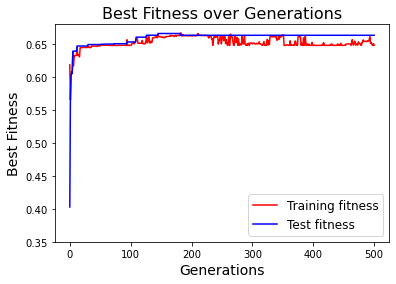

In [187]:
plt.plot(gen, max_fitness_values, color='red', label="Training fitness")
plt.plot(gen, fitness_test, color='blue', label="Test fitness")
plt.legend(fontsize=12)
plt.xlabel('Generations', fontsize=14)
plt.ylabel('Best Fitness', fontsize=14)
plt.title('Best Fitness over Generations', fontsize=16)
plt.yticks(np.arange(0.35, 0.67, 0.05))
plt.show()

Average fitness plot

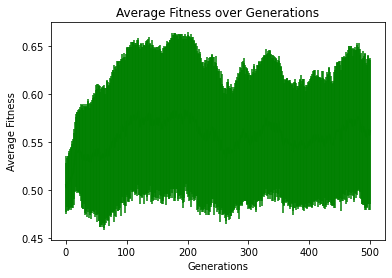

In [188]:
plt.xlabel('Generations')
plt.ylabel('Average Fitness')
plt.title('Average Fitness over Generations')
plt.errorbar(gen, mean_fitness_values, yerr=std_fitness_values,label="Best", color="Green")
plt.show()

Genome length plots

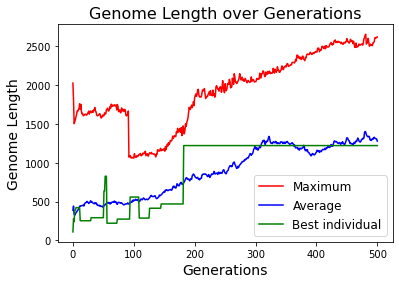

In [189]:
plt.plot(gen, max_length, color='red', label="Maximum")
plt.plot(gen, avg_length, color='blue', label="Average")
plt.plot(gen, best_ind_length, color='green', label="Best individual")
plt.legend(fontsize=12)
plt.xlabel('Generations', fontsize=14)
plt.ylabel('Genome Length', fontsize=14)
plt.title('Genome Length over Generations', fontsize=16)
plt.show()